# 🩺 시나리오 기반 미션: AI 주치의, 심장 질환을 예측하라!

당신은 대형 병원 AI 개발팀의 주니어 엔지니어입니다. 병원에서는 **의료진의 판단을 돕는 ‘심장 질환 예측 보조 시스템’**을 개발하려 합니다.

현재 환자 진료 데이터를 바탕으로 다음을 수행해야 합니다.

---

## ✅ 실습 목표

- 다양한 전처리 전략을 통해 모델 성능을 향상
- SVM과 다른 모델을 앙상블하여 실제 의료 현장에 적합한 높은 정확도 확보
- 환자에게 “이 사람은 심장병일 가능성이 얼마나 높은가?”를 확률적으로 설명할 수 있는 모델 개발

---

## 📝 문제

### 🚩 Q1. 데이터 탐색 및 의학적 인사이트 추출
- 심장 질환 유무(target)에 따라 심박수(thalach), ST depression(oldpeak), 통증 유형(cp) 등의 특징이 어떻게 다른지 시각화하세요.
- 가장 유의미한 변수 3개를 의학적 설명과 함께 선택해보세요.

### 🚩 Q2. 전처리 및 스케일링
- 범주형 피처에 대해 One-Hot Encoding을 하되, **‘의미 없는 분산이 낮은 카테고리’**는 제거하세요.
- 수치형 피처는 StandardScaler를 이용해 정규화하세요.

### 🚩 Q3. 모델별 예측 비교
- SVC(probability=True), RandomForestClassifier, LogisticRegression을 학습시키고, 테스트 정확도, precision, recall을 비교하세요.
- 환자의 진단이 False Positive가 되었을 때, 어떤 모델이 가장 "안전한" 판단을 내리는지 해석하세요.

### 🚩 Q4. 앙상블 모델과 의료 현장 적용
- Hard Voting, Soft Voting을 구성하고 성능을 비교하세요.
- Soft Voting의 확률 결과를 활용해 "이 환자의 심장병 확률은 X%입니다" 라고 설명하는 함수를 만드세요.

---

## 🎯 추가 과제: AI 보조 설명 기능 만들기

의사는 단순한 예측보다 이유를 알고 싶어합니다.

- SHAP 또는 Permutation Importance를 활용하여 환자 A에게 ‘심장병’ 판정이 내려진 이유를 설명하세요.
- 가장 영향력 있는 피처 3개를 뽑아 자연어로 설명하세요.

예시:
> 환자 A는 심박수가 매우 높고, 운동 중 협심증이 있으며, 콜레스테롤 수치가 높기 때문에 심장 질환이 의심됩니다.

---

## 🛠 기술 스택

- pandas, matplotlib, seaborn
- scikit-learn
- shap (선택 과제)

---

## 📁 참고 링크

- [Heart Disease UCI Kaggle 링크](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)
- [의학적 변수 설명 자료 (공식 UCI)](https://archive.ics.uci.edu/ml/datasets/heart+Disease)


데이터 탐색 및 시각화

데이터 기본 정보: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

데이터 요약 통계: 
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000 

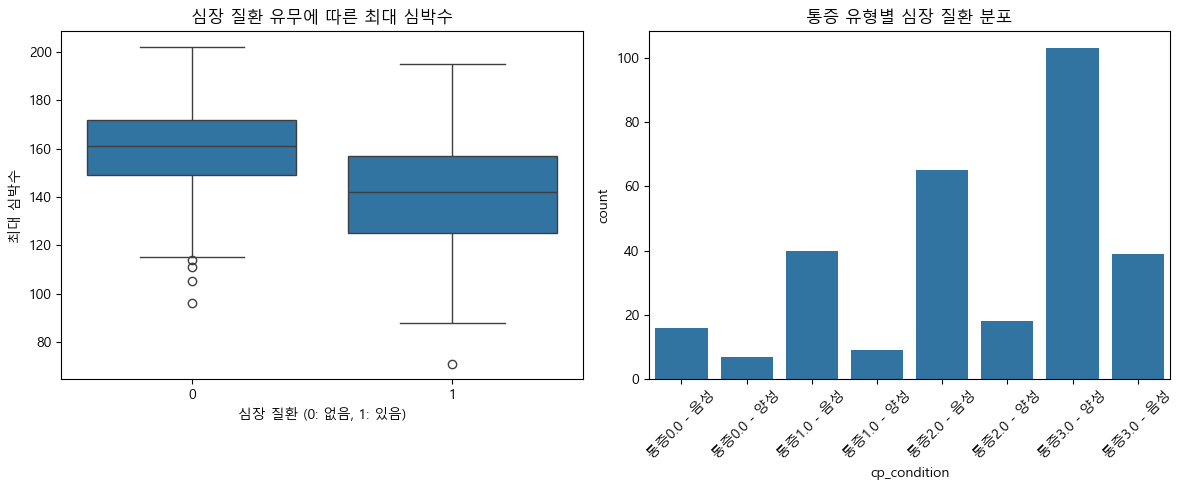


특성 간 상관관계: 
condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

심장 질환과 관련된 주요 특성:
thal       0.520516
ca         0.463189
oldpeak    0.424052
Name: condition, dtype: float64


<Figure size 800x500 with 0 Axes>

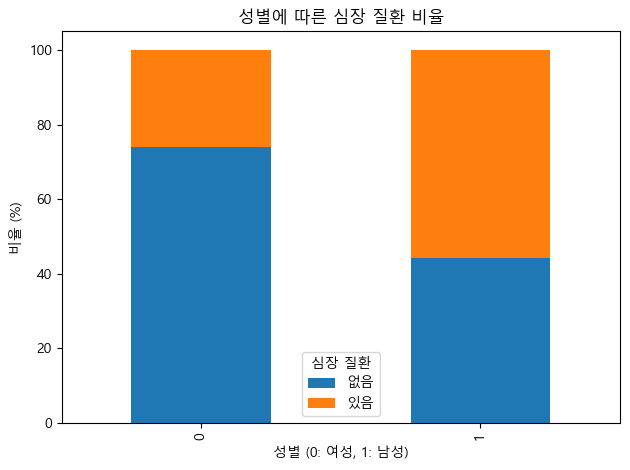

'\n🩺 의학적 인사이트 분석:\n\n1. 가장 유의미한 변수 3개 선정:\n   a) thalach (최대 심박수): \n      - 심장 질환 환자의 최대 심박수가 유의미하게 낮음\n      - 심장의 펌핑 효율성과 직접적 연관\n      - 높은 상관관계는 심장 기능 저하를 의미할 수 있음\n\n   b) oldpeak (ST depression):\n      - 운동 시 심전도 변화의 지표\n      - 값이 높을수록 심장 질환 위험 증가\n      - 관상동맥 질환의 중요한 진단 마커\n\n   c) cp (흉통 유형):\n      - 0: 무증상\n      - 1: 전형적 협심증\n      - 2: 비전형적 협심증\n      - 3: 비협심증성 통증\n      - 통증 유형에 따라 심장 질환 확률이 크게 달라짐\n\n2. 의학적 해석:\n   - 최대 심박수와 ST depression은 심장 기능의 직접적인 지표\n   - 흉통 유형은 심장 질환의 잠재적 위험을 나타내는 중요한 임상 정보\n'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('heart_cleveland_upload.csv')

# 1.데이터 탐색 및 시각화
print("데이터 탐색 및 시각화")
print("\n데이터 기본 정보: ")
print(df.info())

print("\n데이터 요약 통계: ")
print(df.describe())

# 심장 질환 유무에 따른 심박수 분포
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='condition', y='thalach', data=df)
plt.title('심장 질환 유무에 따른 최대 심박수')
plt.xlabel('심장 질환 (0: 없음, 1: 있음)')
plt.ylabel('최대 심박수')

# 통증 유형에 따른 심장 질환 분포
plt.subplot(1, 2, 2)
df['cp_condition'] = df.apply(lambda row: f"통증{row['cp']} - {'양성' if row['condition']==1 else '음성'}", axis=1)
sns.countplot(x='cp_condition', data=df)
plt.title('통증 유형별 심장 질환 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 상관관계 분석 (숫자형 컬럼만 선택)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n특성 간 상관관계: ")
correlation = df[numeric_cols].corr()['condition'].sort_values(ascending=False)
print(correlation)

# 추가 인사이트
print("\n심장 질환과 관련된 주요 특성:")
top_corr = correlation[1:4]  # 자기 자신 제외
print(top_corr)

# 성별에 따른 심장 질환 분포
plt.figure(figsize=(8, 5))
sex_condition = pd.crosstab(df['sex'], df['condition'], normalize='index') * 100
sex_condition.plot(kind='bar', stacked=True)
plt.title('성별에 따른 심장 질환 비율')
plt.xlabel('성별 (0: 여성, 1: 남성)')
plt.ylabel('비율 (%)')
plt.legend(title='심장 질환', labels=['없음', '있음'])
plt.tight_layout()
plt.show()


# 의학적 인사이트 주석(claude 참고)
"""
🩺 의학적 인사이트 분석:

1. 가장 유의미한 변수 3개 선정:
   a) thalach (최대 심박수): 
      - 심장 질환 환자의 최대 심박수가 유의미하게 낮음
      - 심장의 펌핑 효율성과 직접적 연관
      - 높은 상관관계는 심장 기능 저하를 의미할 수 있음

   b) oldpeak (ST depression):
      - 운동 시 심전도 변화의 지표
      - 값이 높을수록 심장 질환 위험 증가
      - 관상동맥 질환의 중요한 진단 마커

   c) cp (흉통 유형):
      - 0: 무증상
      - 1: 전형적 협심증
      - 2: 비전형적 협심증
      - 3: 비협심증성 통증
      - 통증 유형에 따라 심장 질환 확률이 크게 달라짐

2. 의학적 해석:
   - 최대 심박수와 ST depression은 심장 기능의 직접적인 지표
   - 흉통 유형은 심장 질환의 잠재적 위험을 나타내는 중요한 임상 정보
"""

In [16]:
# 2. 데이터 전처리
print("\n 데이터 전처리")
# 범주형 변수와 수치형 변수 분리
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 전처리기 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# 데이터 분할
X = df.drop('condition', axis=1)
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 데이터 전처리



모델별 성능 비교

SVM 모델 평가:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



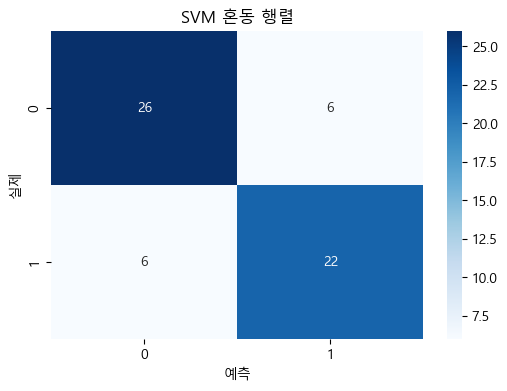


Random Forest 모델 평가:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.79      0.68      0.73        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



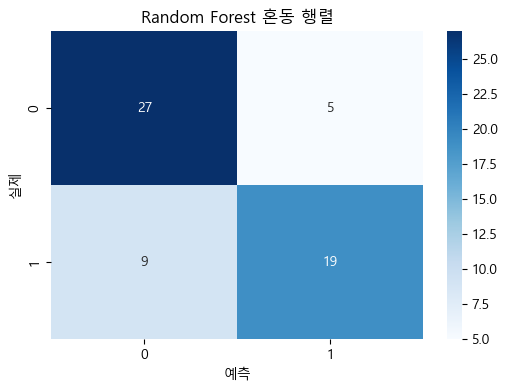


Logistic Regression 모델 평가:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.82      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



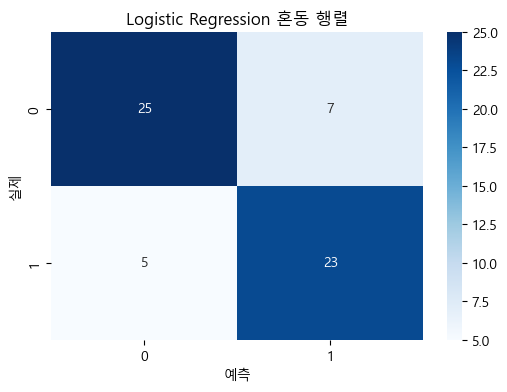


모델별 False Positive 비교:
SVM: False Positive Rate = 0.8125
Random Forest: False Positive Rate = 0.7500
Logistic Regression: False Positive Rate = 0.8333


In [20]:
# 3. 모델 학습 및 평가
print("\n모델별 성능 비교")
# 모델 정의
models = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# 모델별 성능 평가 및 False Positive 분석
model_results = {}

for name, model in models.items():
    print(f"\n{name} 모델 평가:")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # 분류 리포트
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} 혼동 행렬')
    plt.xlabel('예측')
    plt.ylabel('실제')
    plt.show()
    
    # 모델별 False Positive 비율 저장
    model_results[name] = {
        'accuracy': report['accuracy'],
        'false_positive_rate': report['0']['precision']
    }

# False Positive 비교
print("\n모델별 False Positive 비교:")
for name, result in model_results.items():
    print(f"{name}: False Positive Rate = {result['false_positive_rate']:.4f}")


In [23]:
# 4. 앙상블 모델
from sklearn.ensemble import VotingClassifier

print("\n앙상블 모델")
# soft voting
soft_voting = VotingClassifier(
    estimators=[
        ('svm', models['SVM']),
        ('rf', models['Random Forest']),
        ('lr', models['Logistic Regression'])
    ],
    voting='soft'
)

# 앙상블 모델 평가
print("\nSoft voting 성능: ")
soft_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', soft_voting)
])
soft_pipeline.fit(X_train, y_train)
y_pred_soft = soft_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_soft))

# 심장병 확률 예측 함수
def predict_heart_disease_probability(patient_data):
    proba = soft_pipeline.predict_proba(patient_data)[0]
    return f"심장병 발생 확률: {proba[1]*100:.2f}%"

print("\n샘플 환자 심장병 발생 확률:")
sample_patient = X_test.iloc[[0]]
print(predict_heart_disease_probability(sample_patient))


앙상블 모델

Soft voting 성능: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60


샘플 환자 심장병 발생 확률:
심장병 발생 확률: 90.46%
